In [68]:
import pandas as pd
import numpy as np
import json
import re
import string

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

In [69]:
df = pd.read_csv("lyrics.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

In [70]:
df

,track_name,artist,lyrics
0,Problems In Us,Col3trane,[Pre-Chorus]I couldn't believe that you would ...
1,New Shapes,Diplo,\n\n[Chorus]\nYou don't show me no sign of you...
2,Throwaway,SG Lewis,\n\n[Verse 1]\nSometimes I know what's right f...
3,Electrian,DJ Seinfeld,NaN
4,Skip,SuperParka,\n\nI will not always be your friend\nTell you...
...,...,...,...
95,Softly,Clairo,\n\n[Verse 1]\nIs it alright to feel this way ...
96,Club Paradise - Zodivk Remix,Savy Soul,NaN
97,"Pumpy (feat. AJ x Deno, Swarmz & Cadet)",Da Beatfreakz,\n\n[Intro: Swarmz & Cadet]\nThis is the 9 sid...
98,Nevermind,Dennis Lloyd,[Intro]What if I left and it made no senseAnd ...


In [71]:
df = df.dropna()
df = df.loc[df['lyrics'] != "[Non-Lyrical Vocals]"]
df = df.loc[df['lyrics'] != '']

In [72]:
df.reset_index(drop=True, inplace=True)

In [73]:
song_lyrics = df['lyrics']

In [74]:
for i in range(len(song_lyrics)):
    song_lyrics[i] = re.sub("[\(\[].*?[\)\]]", " ", str(song_lyrics[i]))
    song_lyrics[i] = song_lyrics[i].replace("\n", " ")
    song_lyrics[i] = re.sub(r"(\w)([A-Z])", r"\1 \2", str(song_lyrics[i]))
    song_lyrics[i] = str(song_lyrics[i]).lower()

In [75]:
len(song_lyrics)

66

In [76]:
df['lyrics'] = song_lyrics

In [77]:
stop_words = list(set(stopwords.words("english")))
stop_words += list(string.punctuation)
stop_words += list("I")
stop_words += list("yeah")
stop_words += list("got")
stop_words += list("wanna")

In [78]:
flat_lyrics = " ".join(df['lyrics'].values)

In [79]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_lyrics = tokenizer.tokenize(flat_lyrics)

In [80]:
lyrics_no_stop_words = [word for word in tokenized_lyrics if word not in stop_words]

In [81]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

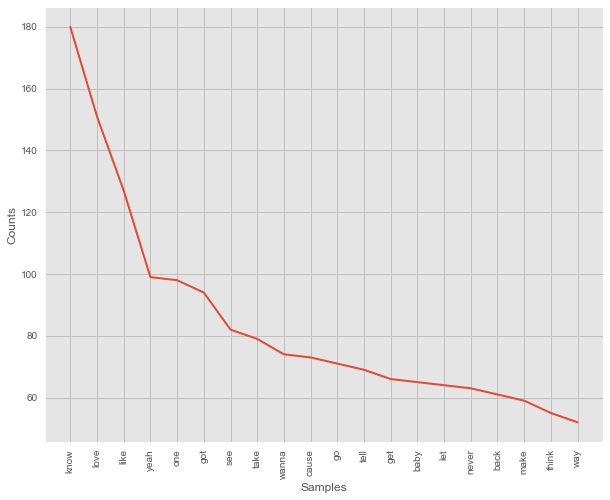

In [82]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
FreqDist(lyrics_no_stop_words).plot(20)
plt.show()

In [83]:
for i, row in df.iterrows():
    row['lyrics'] = re.sub("[,.]", "", str(row['lyrics']))
    row['lyrics'] = re.sub("-", " ", str(row['lyrics']))

In [84]:
df

,track_name,artist,lyrics
0,Problems In Us,Col3trane,i couldn't believe that you would call anothe...
1,New Shapes,Diplo,you don't show me no sign of your innocent...
2,Throwaway,SG Lewis,sometimes i know what's right for me and i...
3,Skip,SuperParka,i will not always be your friend tell yourse...
4,Mile High (feat. Travis Scott & Metro Boomin),James Blake,don't wanna see you by yourself by yoursel...
...,...,...,...
61,Predicament,Kllo,though to be the one i can think about it ...
62,Switch,6LACK,i'm thinking 'bout a yamaha i'm thinking 'bo...
63,Softly,Clairo,is it alright to feel this way so early? a...
64,"Pumpy (feat. AJ x Deno, Swarmz & Cadet)",Da Beatfreakz,this is the 9 side c ad et beat freakz ...


In [85]:
sid = SentimentIntensityAnalyzer()

In [86]:
for i in range(len(df)):
    sentiment = sid.polarity_scores(df.loc[i, 'lyrics'])
    df.loc[i, 'neg'] = sentiment['neg']
    df.loc[i, 'neu'] = sentiment['neu']
    df.loc[i, 'pos'] = sentiment['pos']
    df.loc[i, 'compound'] = sentiment['compound']

In [87]:
df

,track_name,artist,lyrics,neg,neu,pos,compound
0,Problems In Us,Col3trane,i couldn't believe that you would call anothe...,0.224,0.656,0.120,-0.9487
1,New Shapes,Diplo,you don't show me no sign of your innocent...,0.093,0.671,0.236,0.9904
2,Throwaway,SG Lewis,sometimes i know what's right for me and i...,0.028,0.836,0.135,0.9761
3,Skip,SuperParka,i will not always be your friend tell yourse...,0.089,0.711,0.200,0.8791
4,Mile High (feat. Travis Scott & Metro Boomin),James Blake,don't wanna see you by yourself by yoursel...,0.036,0.824,0.140,0.9899
...,...,...,...,...,...,...,...
61,Predicament,Kllo,though to be the one i can think about it ...,0.114,0.828,0.058,-0.9686
62,Switch,6LACK,i'm thinking 'bout a yamaha i'm thinking 'bo...,0.036,0.631,0.334,0.9933
63,Softly,Clairo,is it alright to feel this way so early? a...,0.046,0.844,0.111,0.8661
64,"Pumpy (feat. AJ x Deno, Swarmz & Cadet)",Da Beatfreakz,this is the 9 side c ad et beat freakz ...,0.097,0.795,0.108,0.7970


In [86]:
sentiment = []
for i, row in df.iterrows():
    if row['compound'] > 0:
        sentiment.append("Positive")
    else:
        sentiment.append("Negative")
df["Sentiment"] = sentiment

In [88]:
df

,track_name,artist,lyrics,neg,neu,pos,compound,Sentiment
0,Problems In Us,Col3trane,i couldn't believe that you would cal lnother...,0.235,0.670,0.095,-0.9660,Negative
1,New Shapes,Diplo,you don't show me no sign of your innocent si...,0.093,0.671,0.236,0.9904,Positive
2,Throwaway,SG Lewis,sometimes i know what's right for me and i'll...,0.028,0.836,0.135,0.9761,Positive
3,Skip,SuperParka,i will not always be your friend tell yourself...,0.089,0.711,0.200,0.8791,Positive
4,Mile High (feat. Travis Scott & Metro Boomin),James Blake,don't wanna see you by yourself by yourself b...,0.036,0.824,0.140,0.9899,Positive
...,...,...,...,...,...,...,...,...
61,Predicament,Kllo,though to be the one i can think about it som...,0.114,0.828,0.058,-0.9686,Negative
62,Switch,6LACK,i'm thinking 'bout a yamaha i'm thinking 'bou...,0.023,0.819,0.158,0.9403,Positive
63,Softly,Clairo,is it alright to feel this way so early? and ...,0.046,0.844,0.111,0.8661,Positive
64,"Pumpy (feat. AJ x Deno, Swarmz & Cadet)",Da Beatfreakz,this is the 9 side cadet bea treakz don't mak...,0.097,0.795,0.108,0.7970,Positive


In [108]:
df.rename(columns={'neg':'Negative','pos':'Positive'}, inplace=True)

In [109]:
import seaborn as sns
sns.set_context(context='poster')

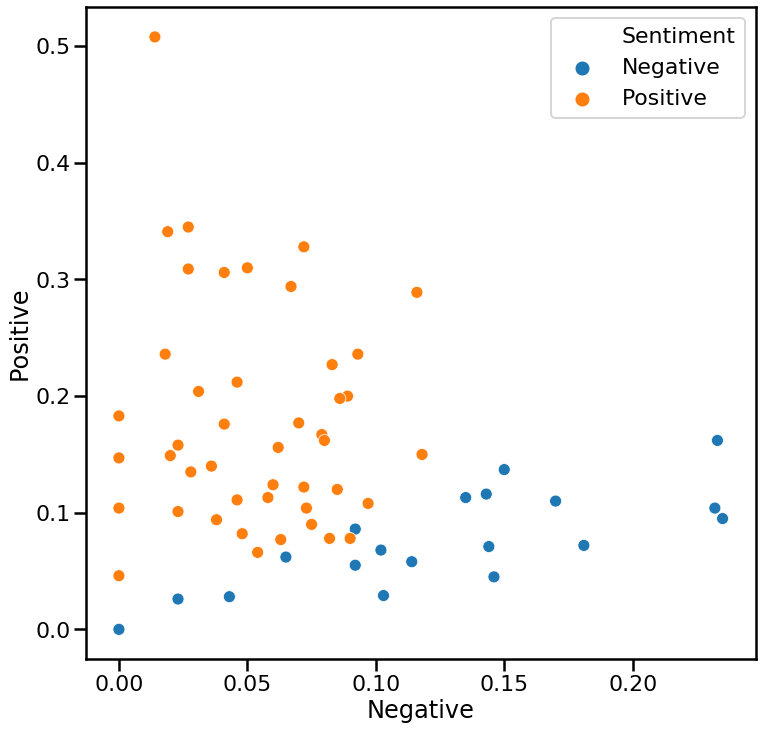

In [110]:
plt.figure(figsize=(12,12))
plt.plot([0,0],[0.25,0.25], linewidth=2)
ax = sns.scatterplot(x="Negative", y="Positive", data=df, hue="Sentiment")
plt.show()